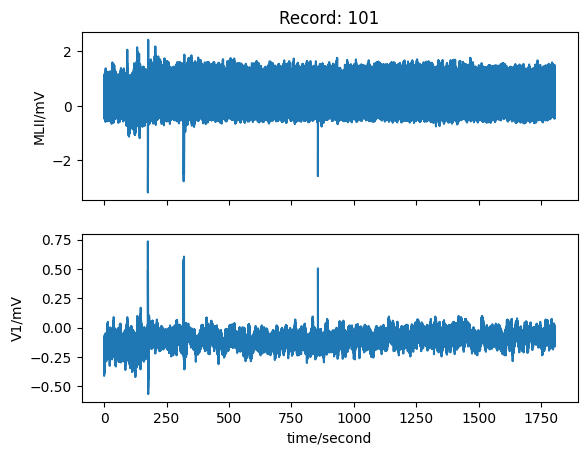

In [1]:
# import the WFDB package
import wfdb

# load a record using the 'rdrecord' function
record = wfdb.rdrecord('../data_v2/101')

# plot the record to screen
wfdb.plot_wfdb(record=record)

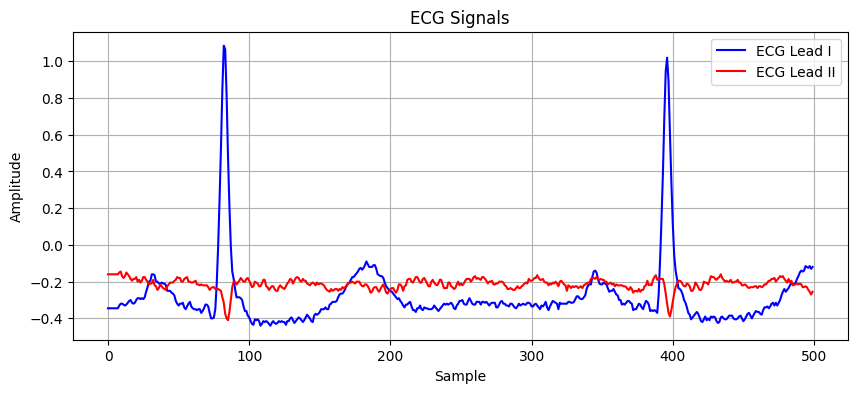

In [2]:
import wfdb
import matplotlib.pyplot as plt
import os 
# Specify the record name
record_name = '../data_v2/101'

# Load the record
record = wfdb.rdrecord(record_name)

# Plot ECG signals
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal[:500, 0], color='b', label='ECG Lead I')
plt.plot(record.p_signal[:500, 1], color='r', label='ECG Lead II')
plt.title('ECG Signals')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


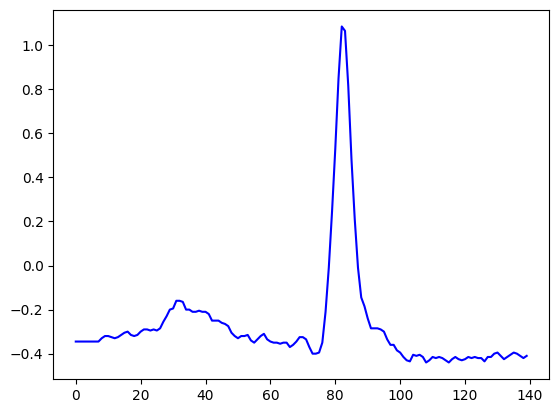

In [3]:
plt.plot(record.p_signal[:140, 0], color='b', label='ECG Lead I')

In [4]:
import wfdb
import os

# Specify the directory containing the dataset
data_dir = '../data_v2'

# Read the annotation file for the record '101'
annotation = wfdb.rdann(os.path.join(data_dir, '100'), 'atr')

# Print the annotation symbols
print("Annotation symbols:", set(annotation.symbol))

Annotation symbols: {'N', 'V', 'A', '+'}


In [5]:
import os
import wfdb

# Path to the directory containing the MIT-BIH Arrhythmia Database files
mit_bih_dir = '../data_v2'

# List all annotation files in the directory
annotation_files = [file for file in os.listdir(mit_bih_dir) if file.endswith('.atr')]

# Initialize a set to store unique annotation symbols (classes)
class_names = set()

# Loop through each annotation file
for annotation_file in annotation_files:
    # Extract record name from the annotation file name
    record_name = os.path.splitext(annotation_file)[0]

    # Read the annotations
    annotation = wfdb.rdann(os.path.join(mit_bih_dir, record_name), 'atr')

    # Get the unique symbols in this record and add them to the set
    class_names.update(set(annotation.symbol))

# Print the unique annotation symbols (classes)
print("Classes in the MIT-BIH Arrhythmia Database:", class_names)


Classes in the MIT-BIH Arrhythmia Database: {'E', 'V', ']', 'x', '+', 'j', 'S', 'f', 'F', 'e', '/', 'A', 'R', 'N', 'a', 'J', '[', '~', '"', '!', 'Q', 'L', '|'}


In [6]:
# !wget "https://raw.githubusercontent.com/HugoGuillen/arff2pandas/master/arff2pandas.py" -O arff2pandas.py
import arff2pandas as a2p
import pandas as pd

with open("../data_v1/ECG5000_TRAIN.arff") as f:
    train = a2p.load(f)
with open("../data_v1/ECG5000_TEST.arff") as f:
    test = a2p.load(f)

df = pd.concat([train, test]).sample(frac=1.0)
df.head()

/Users/harishankarvs/Desktop/miniproj2/notebooks/arff2pandas.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df_str.columns] = df_str.applymap(lambda x:x.decode('utf-8'))
/Users/harishankarvs/Desktop/miniproj2/notebooks/arff2pandas.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df_str.columns] = df_str.applymap(lambda x:x.decode('utf-8'))


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
364,-2.519710,-4.061698,-4.385979,-4.350432,-3.843605,-2.795316,-1.319893,-0.924477,-0.539014,0.138446,...,0.688565,0.667203,0.559754,0.402692,-0.001814,0.050096,-0.047528,-0.994960,-3.128199,1
2311,-0.440257,-2.209795,-3.651824,-4.706752,-4.217517,-3.147263,-2.125114,-1.718610,-1.287792,-0.435031,...,1.116089,1.134978,1.286729,1.611316,1.663387,1.503065,0.957481,1.217503,1.161972,1
2654,0.157965,-0.367846,-0.653518,-1.332399,-1.803569,-2.107857,-2.337140,-2.434524,-2.305367,-2.070167,...,-1.501495,-2.186542,-3.020964,-3.762354,-4.248954,-3.988527,-2.879937,-2.426431,-0.897425,2
160,-1.752512,-3.935122,-4.162923,-4.706901,-3.943258,-2.667937,-1.822964,-1.546180,-0.750791,-0.300270,...,1.161388,1.259082,1.001653,0.797844,0.335841,0.288490,0.275044,1.046386,-0.761081,1
3775,0.164116,-0.463821,-0.922345,-1.466327,-2.038420,-2.726854,-3.101325,-3.172097,-2.990321,-2.568822,...,-1.915282,-2.526680,-3.068236,-3.333068,-3.227132,-2.483334,-1.316576,-0.623635,0.240857,2


<Axes: >

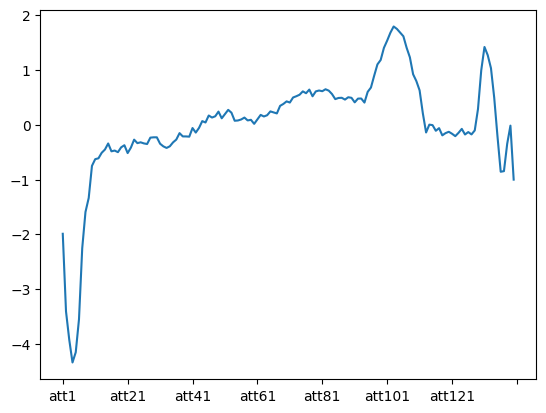

In [7]:
df[df['target']=='1'].iloc[140, :-1].plot() # normal

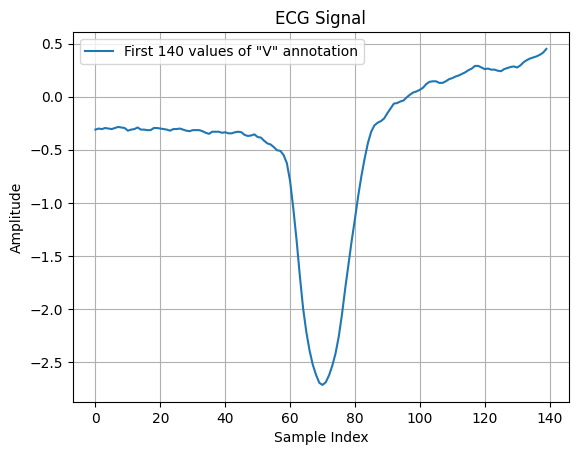

In [8]:
import os
import wfdb
import matplotlib.pyplot as plt

# Path to the directory containing the MIT-BIH Arrhythmia Database files
mit_bih_dir = '../data_v2'

# Record name and annotation symbol of interest
record_name = '100'
annotation_symbol = 'V'  # For normal beats

# Read the signal file
record = wfdb.rdrecord(os.path.join(mit_bih_dir, record_name))

# Extract ECG signal data
ecg_signals = record.p_signal

# Read the annotation file
annotation = wfdb.rdann(os.path.join(mit_bih_dir, record_name), 'atr')

# Find the index of the first occurrence of the specific annotation symbol
index_of_first_n = annotation.symbol.index(annotation_symbol)

# Get the sample index of the first occurrence of the specific annotation symbol
sample_index_of_first_n = annotation.sample[index_of_first_n]

# Extract the first 140 signal values starting from the sample index of the first "N" annotation
start_index = max(0, sample_index_of_first_n - 70)  # Get 70 samples before the annotation
end_index = min(len(ecg_signals), sample_index_of_first_n + 70)  # Get 70 samples after the annotation
signal_values = ecg_signals[start_index:end_index, 0]  # Assuming ecg_signals is 2D, adjust indexing if needed

# Plot the signal values
plt.plot(signal_values, label=f'First 140 values of "{annotation_symbol}" annotation')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# annotation.__dict__

In [302]:
import wfdb
import os
import numpy as np
from scipy.interpolate import interp1d
from collections import Counter

# Path to the downloaded database (Change this to the appropriate path)
database_path = '../data_v2'
records_file_path = '../data_v2/RECORDS'
sig = []

# Function to extract beats and their classes from a record
def extract_beats(record_name):
    record = wfdb.rdrecord(os.path.join(database_path, record_name))
    ecg_signals = record.p_signal
    annotation = wfdb.rdann(os.path.join(database_path, record_name), 'atr')
    
    # Extract beat samples and their corresponding classes
    beat_samples = annotation.sample
    beat_classes = annotation.symbol
    
    # Filter out non-beat annotations
    beat_indices = [i for i, c in enumerate(beat_classes) if c in ['f', '~', 'R', 'L', 'J', '[', 'F', 'E', 'e', 'S', 'N', 'Q', 'x', 'j', '"', 'a', 'V', '|', '+', '/', ']', '!', 'A']]
    beat_samples = [beat_samples[i] for i in beat_indices]
    beat_classes = [beat_classes[i] for i in beat_indices]
    
    return beat_samples, beat_classes, ecg_signals

# Function to process all records in the database
def process_database():
    with open(records_file_path, 'r') as f:
        database = f.read().splitlines()
    
    # Iterate over each record in the database
    for record_name in database:
        beats, classes, ecg_signals = extract_beats(record_name)

        for i,c in enumerate(classes):
            if c == '/' and i < len(classes) - 1:
                sampled_ecg = ecg_signals[beats[i]:beats[i+1], 0]
                original_indices = np.arange(len(sampled_ecg))
                new_indices = np.linspace(0, len(sampled_ecg) - 1, 140)
                resized_ecg_interpolated = interp1d(original_indices, sampled_ecg)(new_indices)
                sig.append(resized_ecg_interpolated)
    return sig
        
sig= process_database()

In [303]:
print(len(sig))

7024


In [304]:
df = pd.DataFrame(sig[:4000])

In [305]:
df

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,0.395,0.336079,0.263597,0.132554,-0.022770,-0.228417,-0.405971,-0.405072,-0.387122,-0.428669,...,-0.290000,-0.281439,-0.282482,-0.267842,-0.259101,-0.251403,-0.186223,-0.092086,0.254029,0.915
1,0.885,0.313094,0.192302,0.205863,0.193849,0.207194,0.226547,0.196942,0.188094,0.164640,...,-0.280000,-0.257302,-0.257986,-0.258453,-0.237878,-0.232302,-0.201906,-0.123453,0.158201,0.870
2,0.870,0.263777,0.154676,0.178597,0.160000,0.164676,0.159388,0.121906,0.118741,0.093165,...,-0.285000,-0.295000,-0.276547,-0.272194,-0.259353,-0.233741,-0.207014,-0.109029,0.322410,0.880
3,0.700,0.190360,0.147338,0.113022,0.135324,0.116691,0.090000,0.081367,0.043705,-0.023849,...,-0.303957,-0.293705,-0.307266,-0.272986,-0.280036,-0.265971,-0.224964,-0.151295,0.153777,0.845
4,0.815,0.245180,0.137158,0.138237,0.148633,0.160000,0.170000,0.152338,0.125000,0.100000,...,-0.310863,-0.310899,-0.302446,-0.310000,-0.290791,-0.273633,-0.252662,-0.140216,0.204964,0.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.495,1.410612,1.166835,0.862518,0.700468,0.438489,0.075504,-0.261151,-0.636727,-1.064568,...,-0.285899,-0.287734,-0.285036,-0.252266,-0.222986,-0.117410,0.293921,1.477266,2.096403,1.785
3996,1.685,1.545432,1.345863,1.159317,0.975755,0.772122,0.507374,0.237770,-0.044748,-0.364568,...,-0.210468,-0.245827,-0.288525,-0.286978,-0.297554,-0.221187,0.153885,1.246115,1.942410,1.690
3997,1.595,1.451511,1.274424,1.091835,0.936835,0.745576,0.479712,0.206331,-0.119604,-0.483273,...,-0.600719,-0.573777,-0.538885,-0.534604,-0.507482,-0.402734,0.132518,1.440180,1.828489,1.535
3998,1.485,1.336619,1.128237,0.961187,0.763597,0.541439,0.308741,0.049856,-0.228885,-0.571367,...,-0.252914,-0.017806,0.229856,0.442050,0.653381,0.888705,1.165540,1.460576,1.662950,1.730


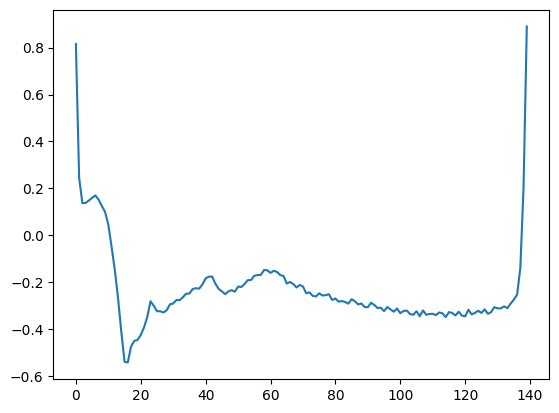

In [306]:
plt.plot(df.iloc[4, :])

In [307]:
df['target']= 4

In [308]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,target
0,0.395,0.336079,0.263597,0.132554,-0.022770,-0.228417,-0.405971,-0.405072,-0.387122,-0.428669,...,-0.281439,-0.282482,-0.267842,-0.259101,-0.251403,-0.186223,-0.092086,0.254029,0.915,4
1,0.885,0.313094,0.192302,0.205863,0.193849,0.207194,0.226547,0.196942,0.188094,0.164640,...,-0.257302,-0.257986,-0.258453,-0.237878,-0.232302,-0.201906,-0.123453,0.158201,0.870,4
2,0.870,0.263777,0.154676,0.178597,0.160000,0.164676,0.159388,0.121906,0.118741,0.093165,...,-0.295000,-0.276547,-0.272194,-0.259353,-0.233741,-0.207014,-0.109029,0.322410,0.880,4
3,0.700,0.190360,0.147338,0.113022,0.135324,0.116691,0.090000,0.081367,0.043705,-0.023849,...,-0.293705,-0.307266,-0.272986,-0.280036,-0.265971,-0.224964,-0.151295,0.153777,0.845,4
4,0.815,0.245180,0.137158,0.138237,0.148633,0.160000,0.170000,0.152338,0.125000,0.100000,...,-0.310899,-0.302446,-0.310000,-0.290791,-0.273633,-0.252662,-0.140216,0.204964,0.890,4


In [309]:
df.shape

(4000, 141)

In [310]:
for i in range(140):
    df.rename(columns={i: f'att{i+1}'}, inplace=True)

In [311]:
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,0.395,0.336079,0.263597,0.132554,-0.022770,-0.228417,-0.405971,-0.405072,-0.387122,-0.428669,...,-0.281439,-0.282482,-0.267842,-0.259101,-0.251403,-0.186223,-0.092086,0.254029,0.915,4
1,0.885,0.313094,0.192302,0.205863,0.193849,0.207194,0.226547,0.196942,0.188094,0.164640,...,-0.257302,-0.257986,-0.258453,-0.237878,-0.232302,-0.201906,-0.123453,0.158201,0.870,4
2,0.870,0.263777,0.154676,0.178597,0.160000,0.164676,0.159388,0.121906,0.118741,0.093165,...,-0.295000,-0.276547,-0.272194,-0.259353,-0.233741,-0.207014,-0.109029,0.322410,0.880,4
3,0.700,0.190360,0.147338,0.113022,0.135324,0.116691,0.090000,0.081367,0.043705,-0.023849,...,-0.293705,-0.307266,-0.272986,-0.280036,-0.265971,-0.224964,-0.151295,0.153777,0.845,4
4,0.815,0.245180,0.137158,0.138237,0.148633,0.160000,0.170000,0.152338,0.125000,0.100000,...,-0.310899,-0.302446,-0.310000,-0.290791,-0.273633,-0.252662,-0.140216,0.204964,0.890,4


In [267]:
df_N = df

In [278]:
df_L = df

In [290]:
df_R = df

In [301]:
df_V = df

In [312]:
df_P = df

In [313]:
df_net = pd.concat([df_N, df_L, df_R, df_V, df_P])

In [317]:
df_net

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,0.840,0.484748,-0.205288,-0.431978,-0.353885,-0.330036,-0.335935,-0.317950,-0.318058,-0.339532,...,-0.352914,-0.365899,-0.432914,-0.492374,-0.517086,-0.334748,-0.044209,0.464317,0.875,0
1,0.940,0.730216,0.113561,-0.303669,-0.459353,-0.440971,-0.390000,-0.388273,-0.380000,-0.392626,...,-0.358777,-0.395180,-0.420971,-0.478309,-0.541906,-0.537626,-0.278993,0.100360,0.690,0
2,0.885,0.838129,0.023381,-0.500540,-0.440683,-0.394101,-0.393921,-0.397518,-0.397878,-0.391619,...,-0.449928,-0.497446,-0.521763,-0.589209,-0.632158,-0.503633,-0.278273,0.082626,0.635,0
3,0.810,0.757266,0.033058,-0.502590,-0.463777,-0.390000,-0.402590,-0.398957,-0.391727,-0.406942,...,-0.353273,-0.380468,-0.420935,-0.476367,-0.556367,-0.485360,-0.231655,0.174640,0.705,0
4,0.820,0.520971,-0.215827,-0.497842,-0.444245,-0.398201,-0.392158,-0.410036,-0.419245,-0.398237,...,-0.372806,-0.393741,-0.448525,-0.503705,-0.540719,-0.414712,-0.169712,0.305108,0.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1.495,1.410612,1.166835,0.862518,0.700468,0.438489,0.075504,-0.261151,-0.636727,-1.064568,...,-0.287734,-0.285036,-0.252266,-0.222986,-0.117410,0.293921,1.477266,2.096403,1.785,4
3996,1.685,1.545432,1.345863,1.159317,0.975755,0.772122,0.507374,0.237770,-0.044748,-0.364568,...,-0.245827,-0.288525,-0.286978,-0.297554,-0.221187,0.153885,1.246115,1.942410,1.690,4
3997,1.595,1.451511,1.274424,1.091835,0.936835,0.745576,0.479712,0.206331,-0.119604,-0.483273,...,-0.573777,-0.538885,-0.534604,-0.507482,-0.402734,0.132518,1.440180,1.828489,1.535,4
3998,1.485,1.336619,1.128237,0.961187,0.763597,0.541439,0.308741,0.049856,-0.228885,-0.571367,...,-0.017806,0.229856,0.442050,0.653381,0.888705,1.165540,1.460576,1.662950,1.730,4


In [318]:
df_net.to_csv('data_v3.csv', index=False)

***Annotations : data_v3***

<h6> N --> 0 : NORMAL</h6>
<h6> L --> 1 : LEFT BUNDLE BRANCH BLOCK BEAT</h6>
<h6> R --> 2 : RIGHT BUNDLE BRANCH BLOCK BEAT</h6>
<h6> V --> 3 : PREMATURE VENTRICULAR CONTRACTION</h6>
<h6> / --> 4 : PACED BEAT</h6>

In [321]:
df = pd.read_csv('data_v3.csv')

In [322]:
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
0,0.840,0.484748,-0.205288,-0.431978,-0.353885,-0.330036,-0.335935,-0.317950,-0.318058,-0.339532,...,-0.352914,-0.365899,-0.432914,-0.492374,-0.517086,-0.334748,-0.044209,0.464317,0.875,0
1,0.940,0.730216,0.113561,-0.303669,-0.459353,-0.440971,-0.390000,-0.388273,-0.380000,-0.392626,...,-0.358777,-0.395180,-0.420971,-0.478309,-0.541906,-0.537626,-0.278993,0.100360,0.690,0
2,0.885,0.838129,0.023381,-0.500540,-0.440683,-0.394101,-0.393921,-0.397518,-0.397878,-0.391619,...,-0.449928,-0.497446,-0.521763,-0.589209,-0.632158,-0.503633,-0.278273,0.082626,0.635,0
3,0.810,0.757266,0.033058,-0.502590,-0.463777,-0.390000,-0.402590,-0.398957,-0.391727,-0.406942,...,-0.353273,-0.380468,-0.420935,-0.476367,-0.556367,-0.485360,-0.231655,0.174640,0.705,0
4,0.820,0.520971,-0.215827,-0.497842,-0.444245,-0.398201,-0.392158,-0.410036,-0.419245,-0.398237,...,-0.372806,-0.393741,-0.448525,-0.503705,-0.540719,-0.414712,-0.169712,0.305108,0.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.495,1.410612,1.166835,0.862518,0.700468,0.438489,0.075504,-0.261151,-0.636727,-1.064568,...,-0.287734,-0.285036,-0.252266,-0.222986,-0.117410,0.293921,1.477266,2.096403,1.785,4
19996,1.685,1.545432,1.345863,1.159317,0.975755,0.772122,0.507374,0.237770,-0.044748,-0.364568,...,-0.245827,-0.288525,-0.286978,-0.297554,-0.221187,0.153885,1.246115,1.942410,1.690,4
19997,1.595,1.451511,1.274424,1.091835,0.936835,0.745576,0.479712,0.206331,-0.119604,-0.483273,...,-0.573777,-0.538885,-0.534604,-0.507482,-0.402734,0.132518,1.440180,1.828489,1.535,4
19998,1.485,1.336619,1.128237,0.961187,0.763597,0.541439,0.308741,0.049856,-0.228885,-0.571367,...,-0.017806,0.229856,0.442050,0.653381,0.888705,1.165540,1.460576,1.662950,1.730,4
